## Initial Graphs

Importing libraries.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cleaning the data here. Same cleaning code from previous notebook (datacleaning.qmd)

In [6]:
# loading the data set
df1 = pd.read_csv("./season1.csv")
df2 = pd.read_csv("./season2.csv")

# removing unwanted columns
df1 = df1[['Date', 'About', 'Position', 'Period', 'Total Player Load', 'Player Load Per Minute', 'IMA Accel Total',
           'IMA Decel Total', 'IMA Jump Count Low Band', 'IMA Jump Count Med Band', 'IMA Jump Count High Band', 'Explosive Efforts']]

df2 = df2[['Date', 'About', 'Position', 'Period', 'Total Player Load', 'Player Load Per Minute', 'IMA Accel Total',
           'IMA Decel Total', 'IMA Jump Count Low Band', 'IMA Jump Count Med Band', 'IMA Jump Count High Band', 'Explosive Efforts']]

# only keeping Period 1 and Period 2 for df1
krows = []
for i in range(len(df1)):
    value = str(df1.loc[i, 'Period'])
    if 'Period 1' in value or 'Period 2' in value:
        krows.append(i)
df1 = df1.loc[krows].reset_index(drop=True)

# delete rows with "Scrimmage"
drows = []
for i in range(len(df1)):
    value = str(df1.loc[i, 'Period'])
    if 'Scrimmage' in value:
        drows.append(i)
    if 'Drill' in value:
        drows.append(i)
df1.drop(index=drows, inplace=True)
df1.reset_index(drop=True, inplace=True)

# Period 1 = 1, Period 2 = 2
# cleaning Period 1
if "2. Period 1" in df1['Period'].values:
    df1['Period'] = df1['Period'].replace("2. Period 1", "Period 1")
if "3. Period 1" in df1['Period'].values:
    df1['Period'] = df1['Period'].replace("3. Period 1", "Period 1")

# cleaning Period 2
if "2. Period 2" in df1['Period'].values:
    df1['Period'] = df1['Period'].replace("2. Period 2", "Period 2")
if "4. Period 2" in df1['Period'].values:
    df1['Period'] = df1['Period'].replace("4. Period 2", "Period 2")
if "3. Period 2" in df1['Period'].values:
    df1['Period'] = df1['Period'].replace("3. Period 2", "Period 2")


# only keeping Period 1 and Period 2 for df2
# Period 1, Period 2
krows = []
for i in range(len(df2)):
    value = str(df2.loc[i, 'Period'])
    if 'Period 1' in value or 'Period 2' in value:
        krows.append(i)
df2 = df2.loc[krows].reset_index(drop=True)

# delete rows with "Scrimmage"
drows = []
for i in range(len(df2)):
    value = str(df2.loc[i, 'Period'])
    if 'Scrimmage' in value:
        drows.append(i)
    if 'Drill' in value:
        drows.append(i)
df2.drop(index=drows, inplace=True)
df2.reset_index(drop=True, inplace=True)

# Period 1 = 1, Period 2 = 2
# cleaning Period 1
if "2. Period 1" in df2['Period'].values:
    df2['Period'] = df2['Period'].replace("2. Period 1", "Period 1")
if "3. Period 1" in df2['Period'].values:
    df2['Period'] = df2['Period'].replace("3. Period 1", "Period 1")
if "1. Period 1" in df2['Period'].values:
    df2['Period'] = df2['Period'].replace("1. Period 1", "Period 1")
if "8. Period 1" in df2['Period'].values:
    df2['Period'] = df2['Period'].replace("8. Period 1", "Period 1")

# cleaning Period 2
if "2. Period 2" in df2['Period'].values:
    df2['Period'] = df2['Period'].replace("2. Period 2", "Period 2")
if "4. Period 2" in df2['Period'].values:
    df2['Period'] = df2['Period'].replace("4. Period 2", "Period 2")
if "3. Period 2" in df2['Period'].values:
    df2['Period'] = df2['Period'].replace("3. Period 2", "Period 2")
if "5. Period 2" in df2['Period'].values:
    df2['Period'] = df2['Period'].replace("5. Period 2", "Period 2")
if "9. Period 2" in df2['Period'].values:
    df2['Period'] = df2['Period'].replace("9. Period 2", "Period 2")
else:
    df2['Period'] = df2['Period']

Our first graph is a bar graph that shows each position and their average explosive efforts for both season 1 and season 2. The UVA Blue represents Season 1 data and the UVA Orange represents Season 2, as seen in the coloring of the title. We are using this bar graph to show that the positions do have different explosive efforts and that this information should be used to train athletes in each position differently. Additionally, the difference for each position between the two seasons is clear in this graph.

In [7]:
#need to average the positions of the players, and then do it for each
name_counts = df1['Position'].value_counts()
name_counts2 = df2['Position'].value_counts()


#Season One Data: adding all the explosive efforts to a list
Guard_total1 = []
forward_total1 = []
center_total1 = []

for index, row in df1.iterrows():
    if row['Position'] == "Guard":
        Guard_total1.append(row['Explosive Efforts'])
    elif row['Position'] == "Forward":
        forward_total1.append(row['Explosive Efforts'])
    elif row['Position'] == "Center":
        center_total1.append(row['Explosive Efforts'])
#Finding the averages
avg_guard1 = sum(Guard_total1) / len(Guard_total1)
avg_forward1 = sum(forward_total1)/len(forward_total1)
avg_center1 = sum(center_total1)/len(center_total1)

#Season Two averages by position
Guard_total2 = []
forward_total2 = []
center_total2 = []

for index, row in df2.iterrows():
    if row['Position'] == "Guard":
        Guard_total2.append(row['Explosive Efforts'])
    elif row['Position'] == "Forward":
        forward_total2.append(row['Explosive Efforts'])
    elif row['Position'] == "Center":
        center_total2.append(row['Explosive Efforts'])
#Finding the averages
avg_guard2 = sum(Guard_total2) / len(Guard_total2)
avg_forward2 = sum(forward_total2)/len(forward_total2)
avg_center2 = sum(center_total2)/len(center_total2)



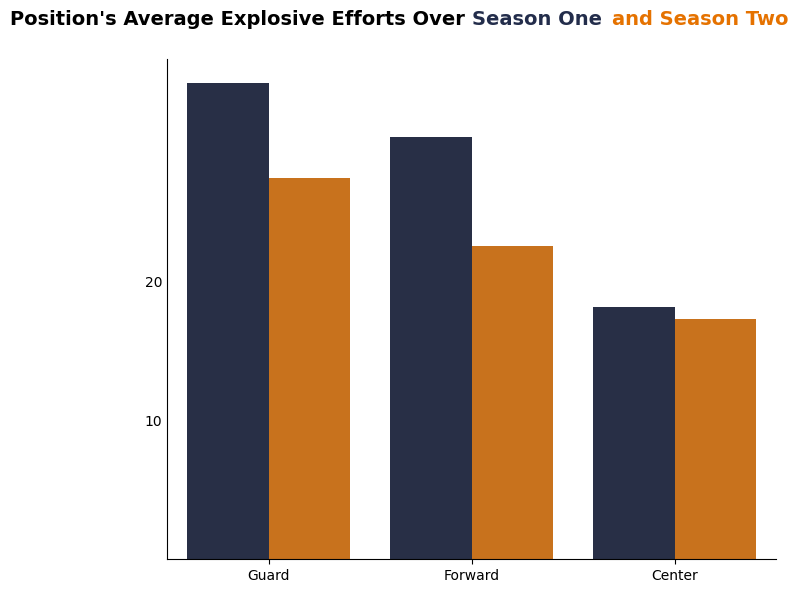

In [8]:
# Making the bar graph
data = {'Guard1': [avg_guard1], 'Guard2': [avg_guard2],'Forward1': [avg_forward1], 'Forward2': [avg_forward2],'Center1': [avg_center1], 'Center2': [avg_center2]}
bar_df = pd.DataFrame(data)

bar_df_long = bar_df.melt(var_name='PositionSeason', value_name='Average Efforts')
bar_df_long['Position'] = bar_df_long['PositionSeason'].str.extract(r'([A-Za-z]+)')
bar_df_long['Season'] = bar_df_long['PositionSeason'].str.extract(r'(\d)').astype(int)


custom_palette = {1: '#232D4B', 2: '#E57200'}
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    data=bar_df_long,
    x='Position',
    y='Average Efforts',
    hue='Season',
    palette=custom_palette,
    ax=ax
)

ax.legend_.remove()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticks([10, 20])


ax.text(0.5, 1.08, "Position's Average Explosive Efforts Over ", transform=ax.transAxes,
        ha='right', va='center', fontsize=14, weight='bold', color='black')
ax.text(0.5, 1.08, "Season One ", transform=ax.transAxes,
        ha='left', va='center', fontsize=14, weight='bold', color='#232D4B')
ax.text(0.5 + 0.23, 1.08, "and Season Two", transform=ax.transAxes,
        ha='left', va='center', fontsize=14, weight='bold', color='#E57200')

plt.tight_layout()
plt.show()

Our second graph is a scatterplot with overlaying linear regression lines of IMA Total Acceleration and Total Player Load. Like in the previous graph, UVA Blue represents Season 1 and UVA Orange represents Season 2. We added the linear regression lines to see if there was a difference between season 1 and 2 in terms of total acceleration compared to total player load. The linear regression line for season 1 has a steeper slope than the linear regression line for season 2, indicating a stronger correlation between the two variables in the first season.

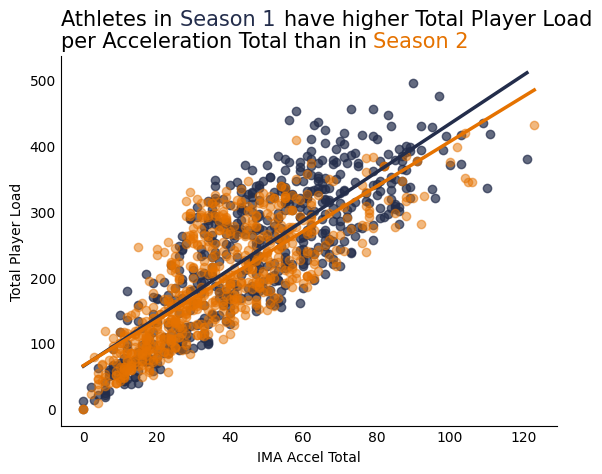

In [9]:
# plot season1, as uva blue
plt.scatter(x=df1['IMA Accel Total'], y=df1['Total Player Load'], color='#232D4B', label='Season 1', alpha=0.7)
# plot season 2, as uva orange
plt.scatter(x=df2['IMA Accel Total'], y=df2['Total Player Load'], color='#E57200', label='Season 2', alpha=0.5)

# calculate slope and intercept for regression line for season 1
slope1, intercept1 = np.polyfit(df1['IMA Accel Total'], df1['Total Player Load'], deg=1)
# create a sequence of x values
xseq1 = np.linspace(df1['IMA Accel Total'].min(), df1['IMA Accel Total'].max(), num=100)
# plot the regression line for season 1
plt.plot(xseq1, intercept1 + slope1*xseq1, color='#232D4B', lw=2.5, label='Season 1 Fit')

# calculate slope and intercept for regression line for season 2
slope2, intercept2 = np.polyfit(df2['IMA Accel Total'], df2['Total Player Load'], deg=1)
# create a sequence of x values
xseq2 = np.linspace(df2['IMA Accel Total'].min(), df2['IMA Accel Total'].max(), num=100)
# plot the regression line for season 2
plt.plot(xseq2, intercept2 + slope2*xseq2, color='#E57200', lw=2.5, label='Season 2 Fit')


# title
plt.text(0.0, 1.1, 'Athletes in', fontsize=15, ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.24, 1.1, 'Season 1', fontsize=15, ha='left', va='center', transform=plt.gca().transAxes, color='#232D4B')
plt.text(0.45, 1.1, 'have higher Total Player Load', fontsize=15, ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.0, 1.04, 'per Acceleration Total than in', fontsize=15, ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.63, 1.04, 'Season 2', fontsize=15, ha='left', va='center', transform=plt.gca().transAxes, color='#E57200')
# axis labels
plt.xlabel('IMA Accel Total')
plt.ylabel('Total Player Load')
# spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# ticks
plt.tick_params(axis='both', which='both', length=0)

# show
plt.show()

Our third graph shows cumulative growth of Player Load throughout the season by player. Showing consistent increases for all players in player load, though, appearing to have more players in season 1 with slower growth. This signifies an improvement in total team player load, improving consistency throughout the season.

In [10]:
gamesums1 = df1.groupby(['Date', 'About', 'Position'])['Total Player Load'].sum().reset_index()

# Step 2: Adjust for only 2 periods (divide by 2)
gamesums1['Total Player Load'] = gamesums1['Total Player Load']

# Step 3: Create new DataFrame with desired columns
PL_per_player_df1 = gamesums1[['Date', 'About', 'Position', 'Total Player Load']].copy()

# Optional: rename columns if you'd like
PL_per_player_df1.rename(columns={'About': 'Player'}, inplace=True)
PL_per_player_df1['Date'] = pd.to_datetime(PL_per_player_df1['Date'])

# --- Sort by Date ---
PL_per_player_df1.sort_values(by='Date', inplace=True)
PL_per_player_df1.reset_index(drop=True, inplace=True)

# Preview result, now in chronological order
print(PL_per_player_df1.head())

# Preview result
print(PL_per_player_df1.head())

        Date     Player Position  Total Player Load
0 2022-11-07  Athlete A   Center            181.132
1 2022-11-07  Athlete B    Guard             51.085
2 2022-11-07  Athlete C    Guard            334.842
3 2022-11-07  Athlete D    Guard            566.067
4 2022-11-07  Athlete F    Guard            435.642
        Date     Player Position  Total Player Load
0 2022-11-07  Athlete A   Center            181.132
1 2022-11-07  Athlete B    Guard             51.085
2 2022-11-07  Athlete C    Guard            334.842
3 2022-11-07  Athlete D    Guard            566.067
4 2022-11-07  Athlete F    Guard            435.642


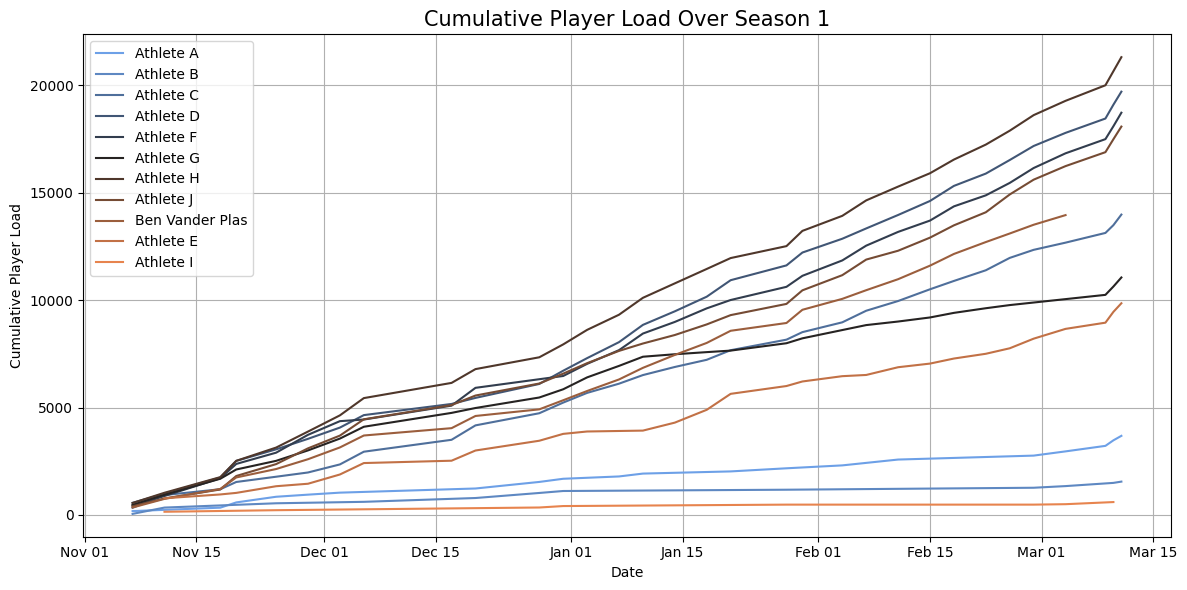

In [26]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
palette = sns.diverging_palette(250, 30, l=65, center="dark", n=len(PL_per_player_df1['Player'].unique()))
n = 0

for player in PL_per_player_df1['Player'].unique():
    player_data1 = PL_per_player_df1[PL_per_player_df1['Player'] == player].copy()
    player_data1.sort_values('Date', inplace=True)
    player_data1['Cumulative Load'] = player_data1['Total Player Load'].cumsum()

    sns.lineplot(x=player_data1['Date'], y=player_data1['Cumulative Load'], label=player, color= palette[n])
    n += 1

plt.title('Cumulative Player Load Over Season 1', fontsize = 15)
plt.xlabel('Date')
plt.ylabel('Cumulative Player Load')

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks()
plt.legend(loc='upper left')  #
plt.tight_layout()
plt.grid(True)  # Optional: Add gridlines for readability
plt.show()

In [27]:
gamesums2 = df2.groupby(['Date', 'About', 'Position'])['Total Player Load'].sum().reset_index()

# Step 2: Adjust for only 2 periods (divide by 2)
gamesums2['Total Player Load'] = gamesums2['Total Player Load'] / 2

# Step 3: Create new DataFrame with desired columns
PL_per_player_df2 = gamesums2[['Date', 'About', 'Position', 'Total Player Load']].copy()

# Optional: rename columns if you'd like
PL_per_player_df2.rename(columns={'About': 'Player'}, inplace=True)
PL_per_player_df2['Date'] = pd.to_datetime(PL_per_player_df2['Date'])

# --- Sort by Date ---
PL_per_player_df2.sort_values(by='Date', inplace=True)
PL_per_player_df2.reset_index(drop=True, inplace=True)

# Preview result, now in chronological order
print(PL_per_player_df2.head())

# Preview result
print(PL_per_player_df2.head())

        Date     Player Position  Total Player Load
0 2023-10-14  Athlete P   Center            90.6575
1 2023-10-14  Athlete E  Forward           189.2625
2 2023-10-14  Athlete F    Guard           140.1695
3 2023-10-14  Athlete L  Forward           132.9340
4 2023-10-14  Athlete M    Guard           128.3865
        Date     Player Position  Total Player Load
0 2023-10-14  Athlete P   Center            90.6575
1 2023-10-14  Athlete E  Forward           189.2625
2 2023-10-14  Athlete F    Guard           140.1695
3 2023-10-14  Athlete L  Forward           132.9340
4 2023-10-14  Athlete M    Guard           128.3865


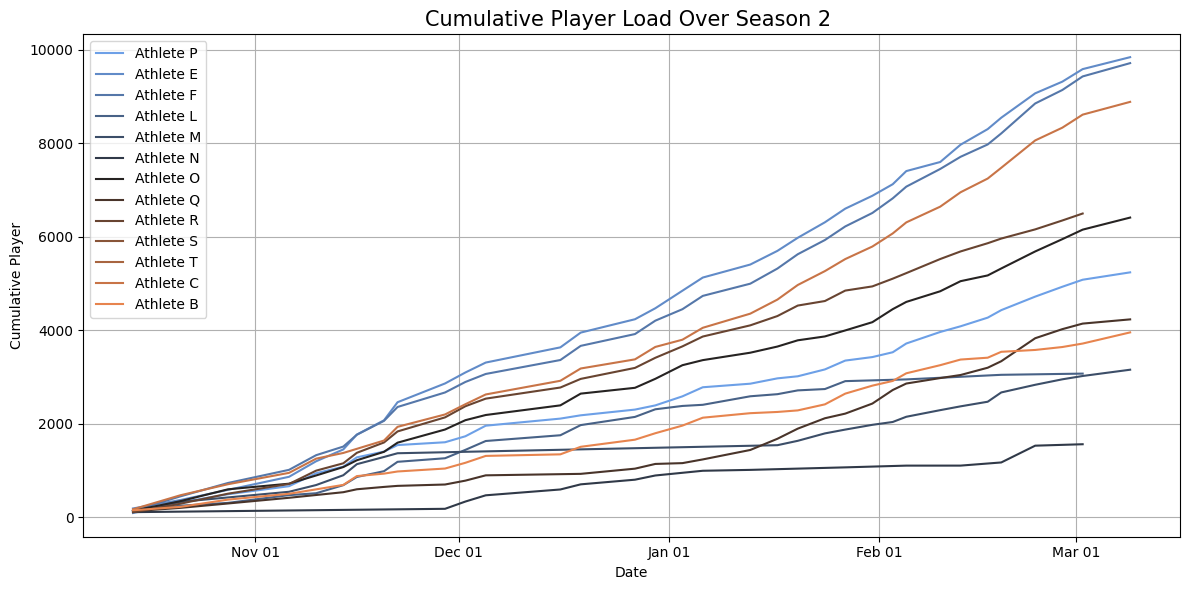

In [25]:
plt.figure(figsize=(12, 6))
palette = sns.diverging_palette(250, 30, l=65, center="dark", n=len(PL_per_player_df2['Player'].unique()))
n = 0

for player in PL_per_player_df2['Player'].unique():
    player_data2 = PL_per_player_df2[PL_per_player_df2['Player'] == player].copy()
    player_data2.sort_values('Date', inplace=True)
    player_data2['Cumulative Load'] = player_data2['Total Player Load'].cumsum()

    sns.lineplot(x=player_data2['Date'], y=player_data2['Cumulative Load'], label=player, color= palette[n])
    n += 1

plt.title('Cumulative Player Load Over Season 2 ', fontsize =15)
plt.xlabel('Date')
plt.ylabel('Cumulative Player')


plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks()
plt.legend(loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()